# Demo notebook with timing

Notebook has been runned on a macbook with mac m1 chip, 8Gg RAM and 256GB SSD. The notebook is runned with python 3.9.12.
It uses a CRSP database from 1973 to end 2023, roughly 44,276,311 rows for 12 columns, or 850Mb in parquet format.

In [1]:
import numpy as np
import py_event_studies as pes
from IPython.display import display

In [2]:
%%time

pes.clear_cache() # If you want to clear the cache manually (not necessary, for demo and showing usefullness bellows)

Cache cleared successfully.
CPU times: user 701 µs, sys: 161 ms, total: 162 ms
Wall time: 907 ms


In [3]:
%%time 
# First load is a bit long due to preprocessing
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Loading and preprocessing data from ../.data/CRSPAllClean.parquet
Cached preprocessed data for ../.data/CRSPAllClean.parquet
Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 1min 21s, sys: 1min 2s, total: 2min 23s
Wall time: 4min 26s


In [4]:
%%time 
# While second use caching mechanism and is much faster (using files, not RAM, so will works over multiple sessions)
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 1.78 s, sys: 6.25 s, total: 8.03 s
Wall time: 29.1 s


In [5]:
%%time 
date = '20120816'
valid_permnos = pes.get_valid_permno_at_date(date)

results = pes.compute(date, valid_permnos[np.array([1,10,50,23,35, 102, 55, 66, 548,1002])])
print(results)

Event Study Results
Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009]...
Number of stocks: 10
Estimation period: 249 days
Event period: 10 days
Number of cluster configurations: 9
Number of models: 10
Available tests: std, CS, BMP, KP
CPU times: user 16.2 s, sys: 819 ms, total: 17 s
Wall time: 34 s


In [6]:
# Get help on available methods and properties
results.help()

Available methods and properties:
- estim_preds: Predicted returns for estimation period
- event_preds: Predicted returns for event period
- std_test_stats, cs_test_stats, bmp_test_stats, kp_test_stats: Test statistics
- std_p_values, cs_p_values, bmp_p_values, kp_p_values: P-values for tests
- get_test_result(test_name): Get test statistics for a specific test
- get_p_values(test_name): Get p-values for a specific test
- summary(): Print a detailed summary of results
- plot(cluster_idx, model_idx): Plot true vs predicted returns for a specific model and cluster configuration
- to_excel(filename): Export results to an Excel file


In [7]:
# Access test statistics and p-values
display(results.std_test_stats)
display(results.std_p_values)

# Get predictions
display(results.estim_preds)
display(results.event_preds)

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.390587,0.385039,0.387562,0.347084,0.581934,0.583087,0.507404,119.627495,1.266642,2.544354
10,0.513316,0.527509,0.529802,0.465983,0.581934,0.583087,0.507404,1.950988,1.377732,0.935329
15,0.364202,0.392042,0.393734,0.354033,0.581934,0.583087,0.507404,-1.256377,0.316391,-0.855903
20,0.483043,0.459718,0.462638,0.418715,0.581934,0.583087,0.507404,-7.107959,0.890280,1.075211
25,0.458311,0.454958,0.458077,0.395555,0.581934,0.583087,0.507404,28.005982,1.482038,1.843516
30,0.482496,0.446322,0.446962,0.385260,0.581934,0.583087,0.507404,-2.218615,0.244422,-0.228636
35,0.487659,0.452911,0.454770,0.384696,0.581934,0.583087,0.507404,-0.416218,0.546784,0.344394
40,0.349481,0.361300,0.363084,0.318105,0.581934,0.583087,0.507404,1.851575,0.791902,0.447860
50,0.511677,0.502126,0.503597,0.444741,0.581934,0.583087,0.507404,-0.347179,0.405743,0.008338


,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.919240,0.920388,0.916224,0.925694,0.832974,0.82887,0.859692,0.011137,0.471559,0.133623
10,0.866330,0.858190,0.852602,0.873725,0.832974,0.82887,0.859692,0.234384,0.421913,0.641729
15,0.929234,0.917650,0.913732,0.922924,0.832974,0.82887,0.859692,0.476363,0.945906,0.685572
20,0.880268,0.889383,0.884132,0.895451,0.832974,0.82887,0.859692,0.020551,0.666545,0.566552
25,0.891251,0.891472,0.886185,0.905617,0.832974,0.82887,0.859692,0.011625,0.379328,0.261400
30,0.880515,0.895225,0.891135,0.910023,0.832974,0.82887,0.859692,0.180124,0.967194,0.971209
35,0.878177,0.892366,0.887665,0.910262,0.832974,0.82887,0.859692,0.909027,0.850345,0.936372
40,0.934570,0.929390,0.925829,0.936825,0.832974,0.82887,0.859692,0.259258,0.721006,0.895775
50,0.867098,0.870171,0.865178,0.883639,0.832974,0.82887,0.859692,0.935388,0.913259,0.999961


array([[[[ 5.86480632e-04,  3.30889466e-03,  3.63221552e-02, ...,
          -1.38659951e-02, -6.18256877e-02, -1.21856630e-03],
         [ 2.58413886e-02,  3.81764912e-02,  2.11187211e-01, ...,
          -1.40529163e-03,  2.45444376e-02,  4.86548090e-02],
         [ 8.72159835e-03, -2.73681213e-03, -6.47677816e-01, ...,
           3.75567295e-02,  4.66511206e-02, -2.48043517e-02],
         ...,
         [-1.60657058e-02, -2.55154937e-02, -1.59903494e-02, ...,
           5.02659904e-03,  9.50172229e-02,  8.35862269e-02],
         [ 5.39712187e-04,  4.32105207e-02,  4.81182710e-02, ...,
          -1.04266700e-02, -2.99848396e-03, -3.79994458e-02],
         [ 8.11232656e-03, -2.92846260e-02, -3.76828519e-02, ...,
           4.35453717e-03,  1.92286413e-02, -1.98252050e-03]],

        [[ 8.79824015e-04,  4.13984293e-03,  3.75755686e-02, ...,
          -1.42794969e-02, -6.36656307e-02,  3.22826663e-04],
         [ 2.52796262e-02,  3.65911962e-02,  2.14305876e-01, ...,
          -2.42076551e

array([[[[-4.68478836e-03,  4.31596160e-02,  9.48448674e-02, ...,
          -7.65890322e-04,  2.96687657e-02, -1.37012787e-03],
         [ 9.69121724e-03,  2.80895332e-02,  2.67984231e-02, ...,
           3.21970457e-02,  5.10600892e-02, -2.38320406e-02],
         [ 1.09326290e-03,  4.36053971e-02, -3.32993742e-02, ...,
          -7.64827296e-03, -3.95908549e-02, -3.16582655e-02],
         ...,
         [ 5.22619461e-03,  9.85748324e-02,  7.33707558e-02, ...,
           3.78263574e-02,  8.18194443e-03, -4.71576083e-02],
         [ 7.86517614e-03, -3.59583218e-02,  3.32834379e-02, ...,
           4.64844969e-02, -3.16699402e-02, -2.67618723e-03],
         [-4.17170559e-03, -6.61964257e-03, -1.49144742e-03, ...,
          -3.55810039e-04, -3.10304339e-02, -1.32964885e-03]],

        [[-4.64335266e-03,  4.32972030e-02,  9.45445782e-02, ...,
          -6.26292106e-04,  3.01382044e-02, -1.89332846e-03],
         [ 8.59311545e-03,  2.49953961e-02,  2.52194624e-02, ...,
           3.23468933e

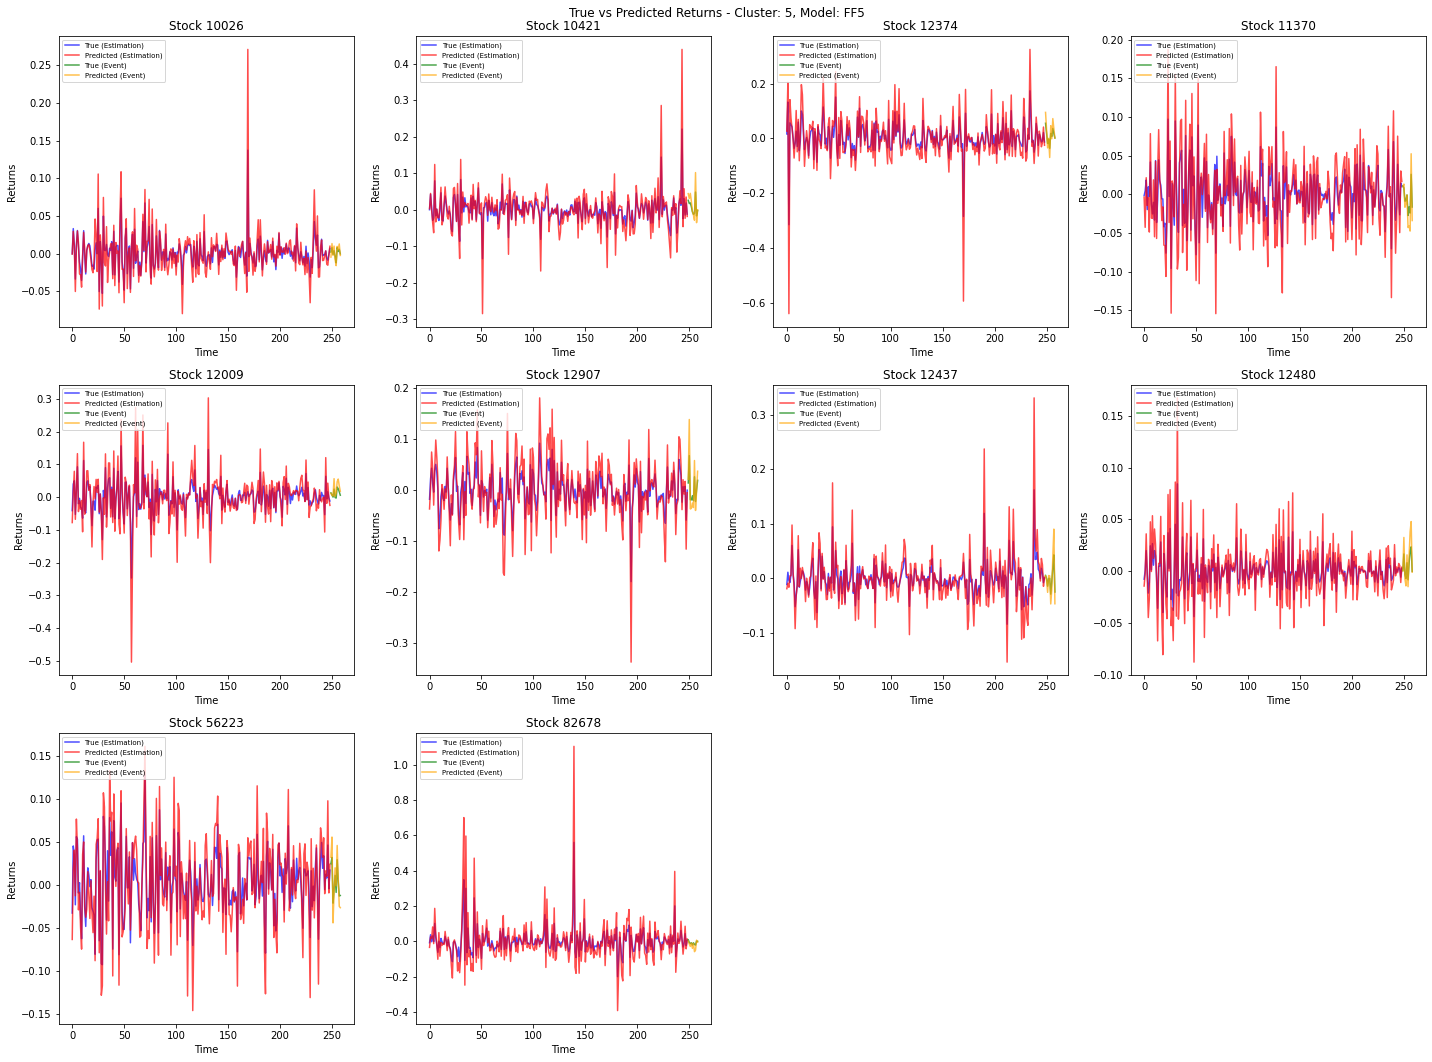

In [8]:
results.plot(5, 'FF5')

In [9]:
results.summary()

Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009 12907 12437 12480 56223 82678]
Number of stocks: 10
Estimation period: 249 days
Event period: 10 days

Test Results:

std Test:
    Cluster only  Cluster + Market  Cluster + FF3  Cluster + FF5  \
5       0.390587          0.385039       0.387562       0.347084   
10      0.513316          0.527509       0.529802       0.465983   
15      0.364202          0.392042       0.393734       0.354033   
20      0.483043          0.459718       0.462638       0.418715   
25      0.458311          0.454958       0.458077       0.395555   
30      0.482496          0.446322       0.446962       0.385260   
35      0.487659          0.452911       0.454770       0.384696   
40      0.349481          0.361300       0.363084       0.318105   
50      0.511677          0.502126       0.503597       0.444741   

    Market Model       FF3       FF5     RidgeCV   LassoCV  ElasticNetCV  
5       0.581934  0.583087  0.507404  119.627495  1.2

In [11]:
results.to_excel('../.data/event_study_results.xlsx')

/Users/remigenet/py_event_studies/py_event_studies/api.py:338: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  with pd.ExcelWriter(filename) as writer:
/Users/remigenet/opt/anaconda3/envs/openBB-env/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
